# Concrete Compressive Strength

## Dataset Description

This dataset contains detailed information about the components of concrete, their respective quantities, and the compressive strength of the concrete

### Features in the Dataset
- **Cement**: Amount of cement used (in kg/m³)
- **Blast Furnace Slag**: Amount of blast furnace slag used (in kg/m³)
- **Fly Ash**: Amount of fly ash used (in kg/m³)
- **Water**: Amount of water used (in kg/m³)
- **Superplasticizer**: Amount of superplasticizer used (in kg/m³)
- **Coarse Aggregate**: Amount of coarse aggregate used (in kg/m³)
- **Fine Aggregate**: Amount of fine aggregate used (in kg/m³)
- **Age (days)**: Number of days the concrete was left to cure

### Target in the Dataset
- **Concrete Compressive Strength**: The final compressive strength of the concrete (in MPa)


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [42]:
df=pd.read_csv("Concrete compressive strength.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [43]:
df.columns


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength '],
      dtype='object')

In [44]:
df.shape


(1030, 9)

In [45]:
df.columns = df.columns.str.strip()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age (day)                      1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [47]:
print("Statistical summary of numeric features:")
df.describe().T

Statistical summary of numeric features:


,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Concrete compressive strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [48]:
duplicates = df[df.duplicated()]
print(duplicates)

     Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.6   
137   362.6               189.0   

In [49]:
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 25


In [50]:
df = df.drop_duplicates()

In [51]:
df.shape

(1005, 9)

In [52]:
df.isnull().any()

Cement                           False
Blast Furnace Slag               False
Fly Ash                          False
Water                            False
Superplasticizer                 False
Coarse Aggregate                 False
Fine Aggregate                   False
Age (day)                        False
Concrete compressive strength    False
dtype: bool

In [53]:
df['Concrete compressive strength'].value_counts()


Concrete compressive strength
31.350474    4
33.398217    3
18.126324    3
39.300132    3
17.540269    3
            ..
35.956173    1
55.509713    1
61.990787    1
63.528319    1
32.401235    1
Name: count, Length: 938, dtype: int64

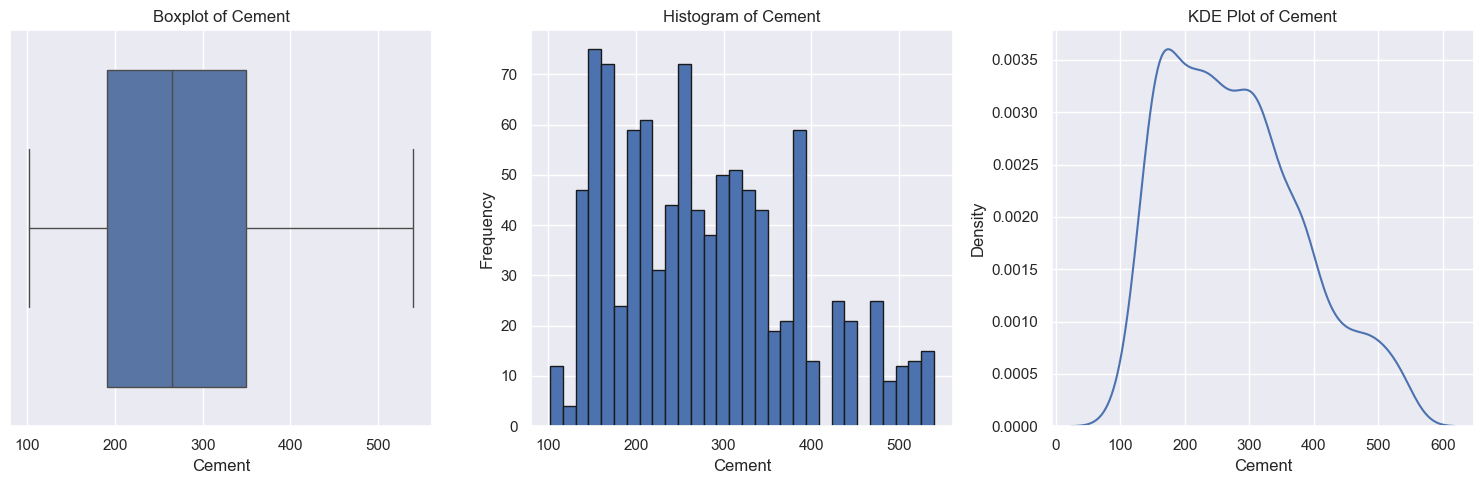

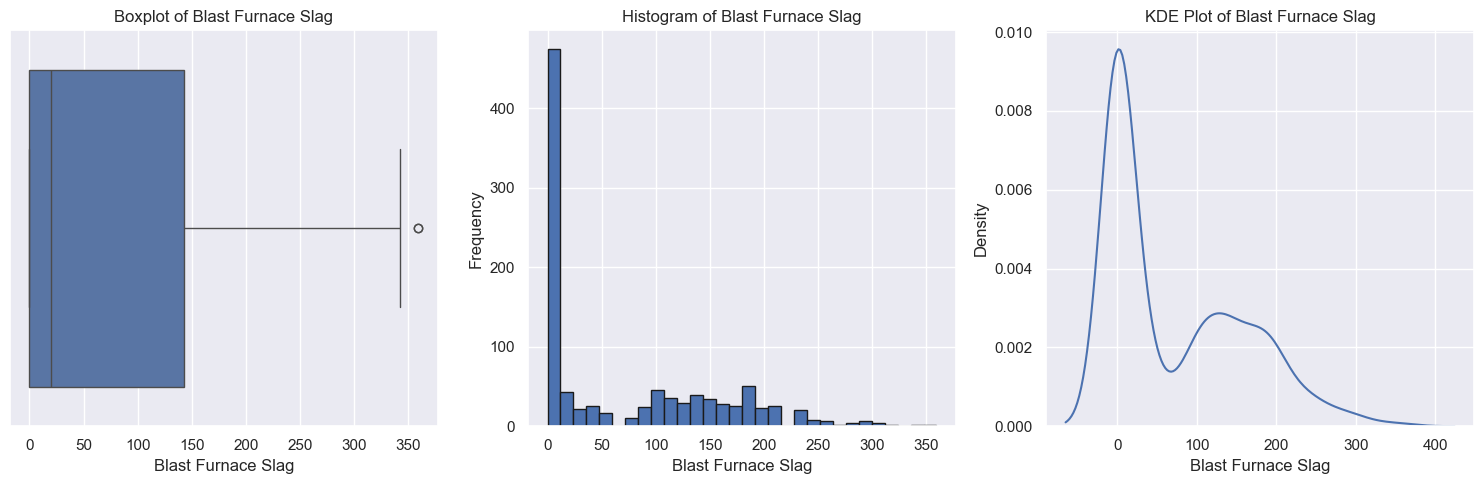

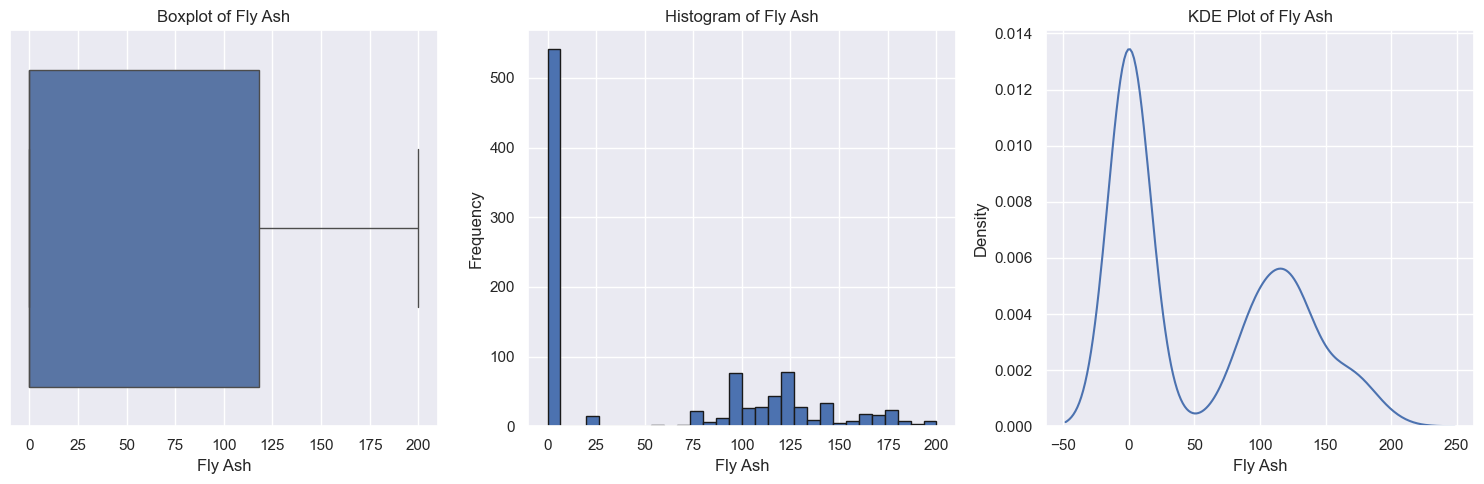

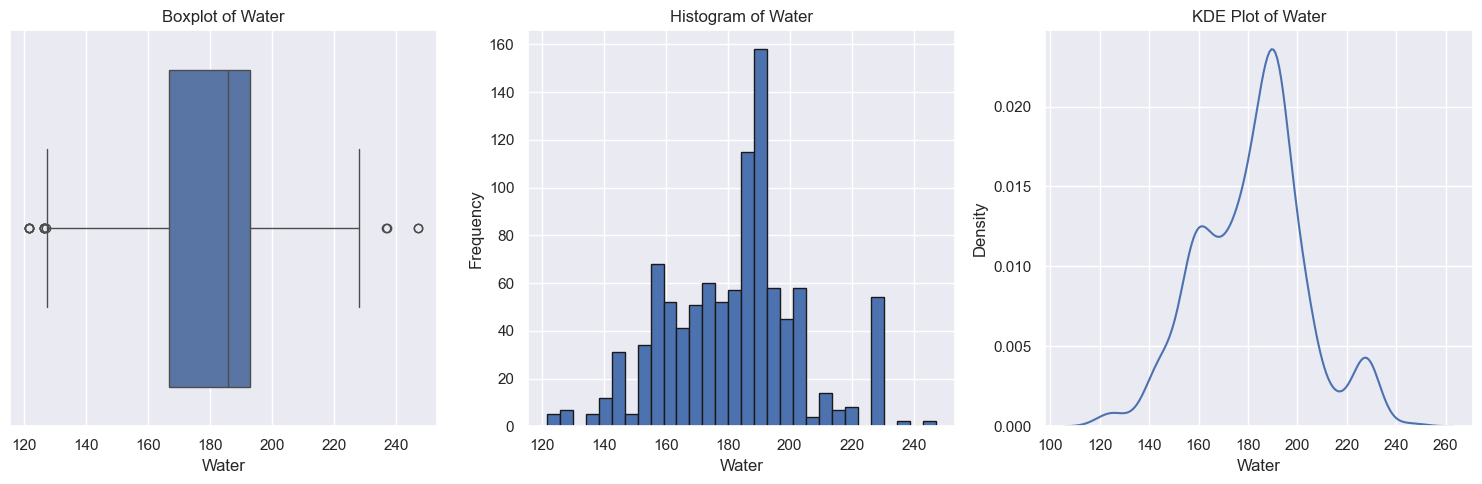

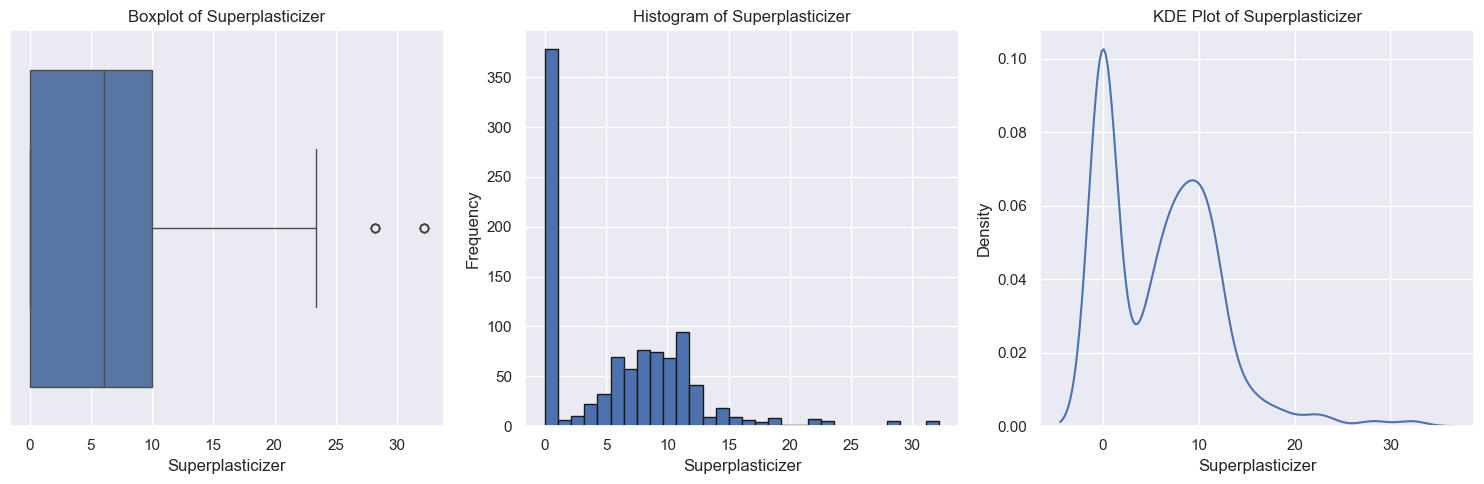

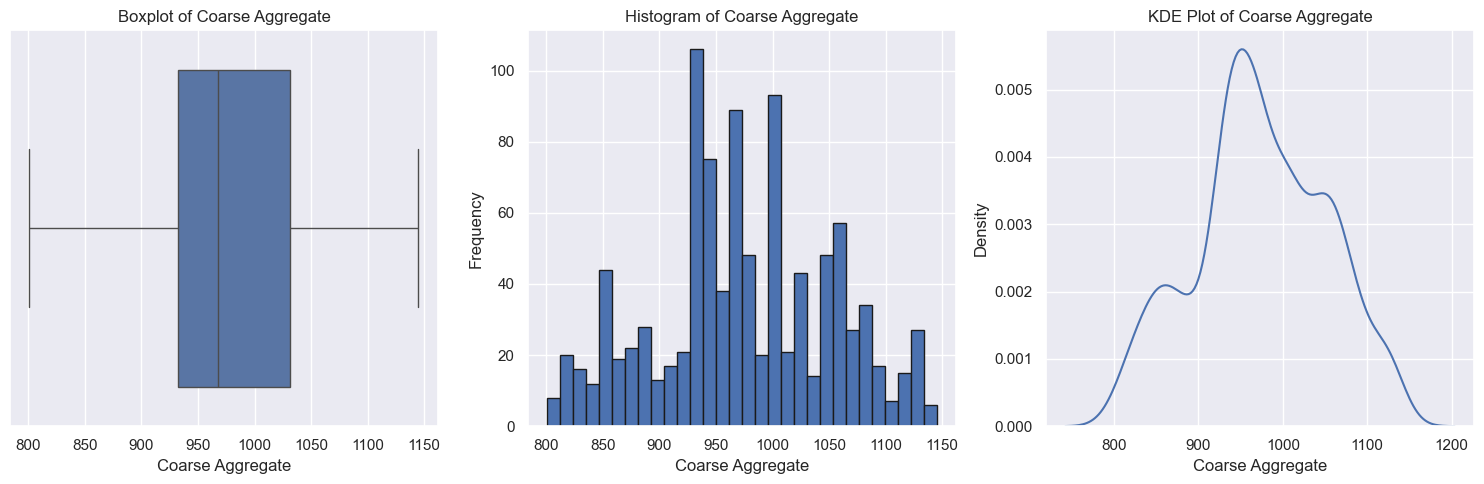

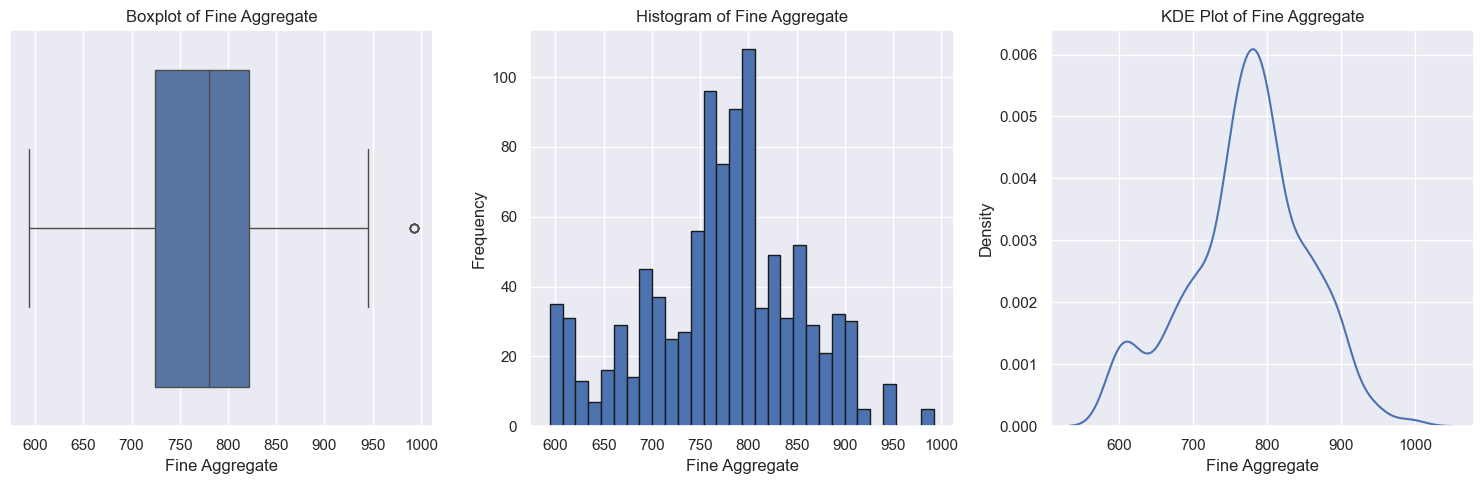

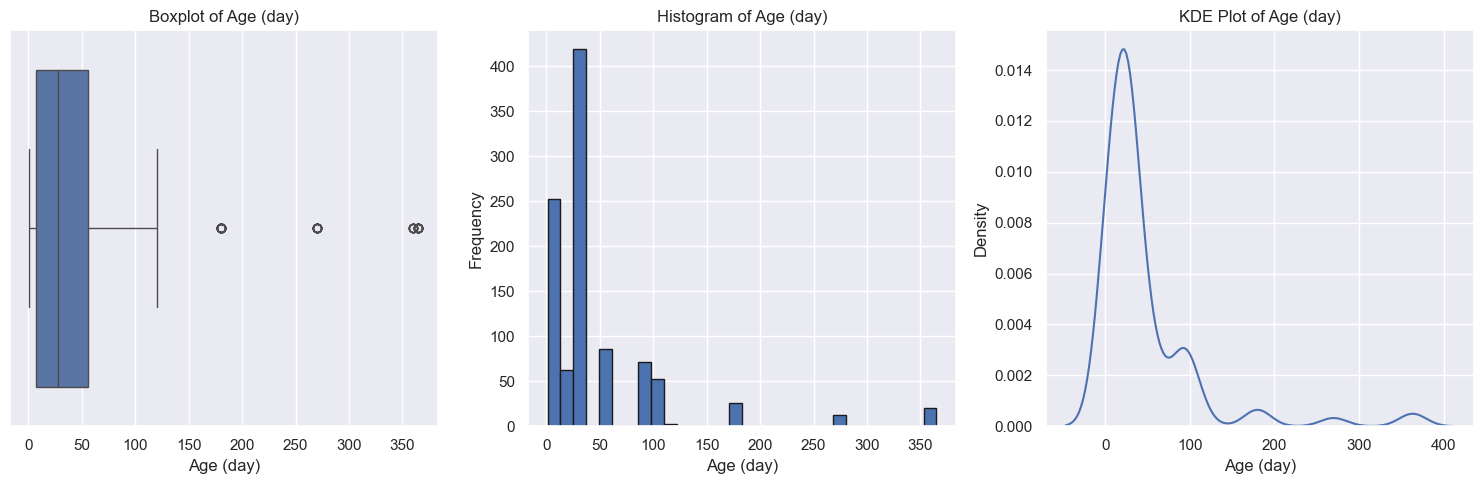

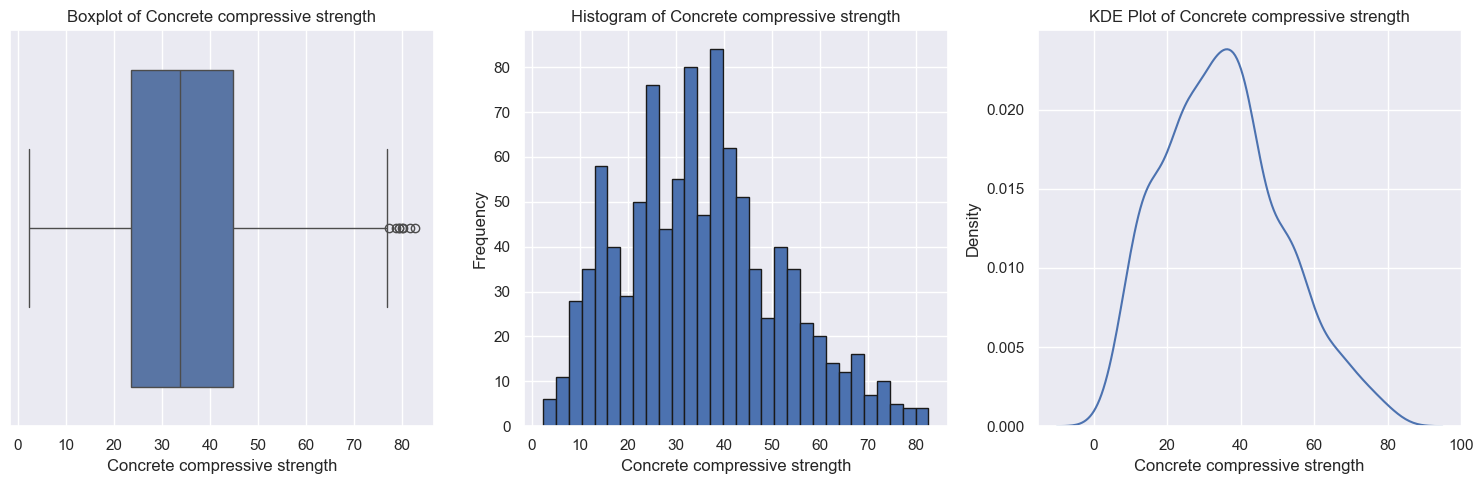

In [54]:
for col in df.columns:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    sns.boxplot(data=df, x=col, ax=ax[0])
    ax[0].set_title(f'Boxplot of {col}')

    ax[1].hist(df[col].dropna(), bins=30, edgecolor='k')
    ax[1].set_title(f'Histogram of {col}')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Frequency')

    sns.kdeplot(data=df, x=col, ax=ax[2])
    ax[2].set_title(f'KDE Plot of {col}')

    plt.tight_layout()
    plt.show()

In [55]:
outlier_cols = [ 'Blast Furnace Slag', 'Water', 'Superplasticizer', 'Fine Aggregate']
for col in outlier_cols:
    df[col] = np.log10(df[col] + 1)

In [56]:
data = df['Concrete compressive strength'].tolist()

fig = go.Figure(
    go.Histogram(x=data, nbinsx=10, marker_color='deepskyblue')
)

fig.update_layout(
    title='Histogram of Strength',
    xaxis_title='Strength Values',
    yaxis_title='Frequency'
)

fig.show()

Index([], dtype='object')


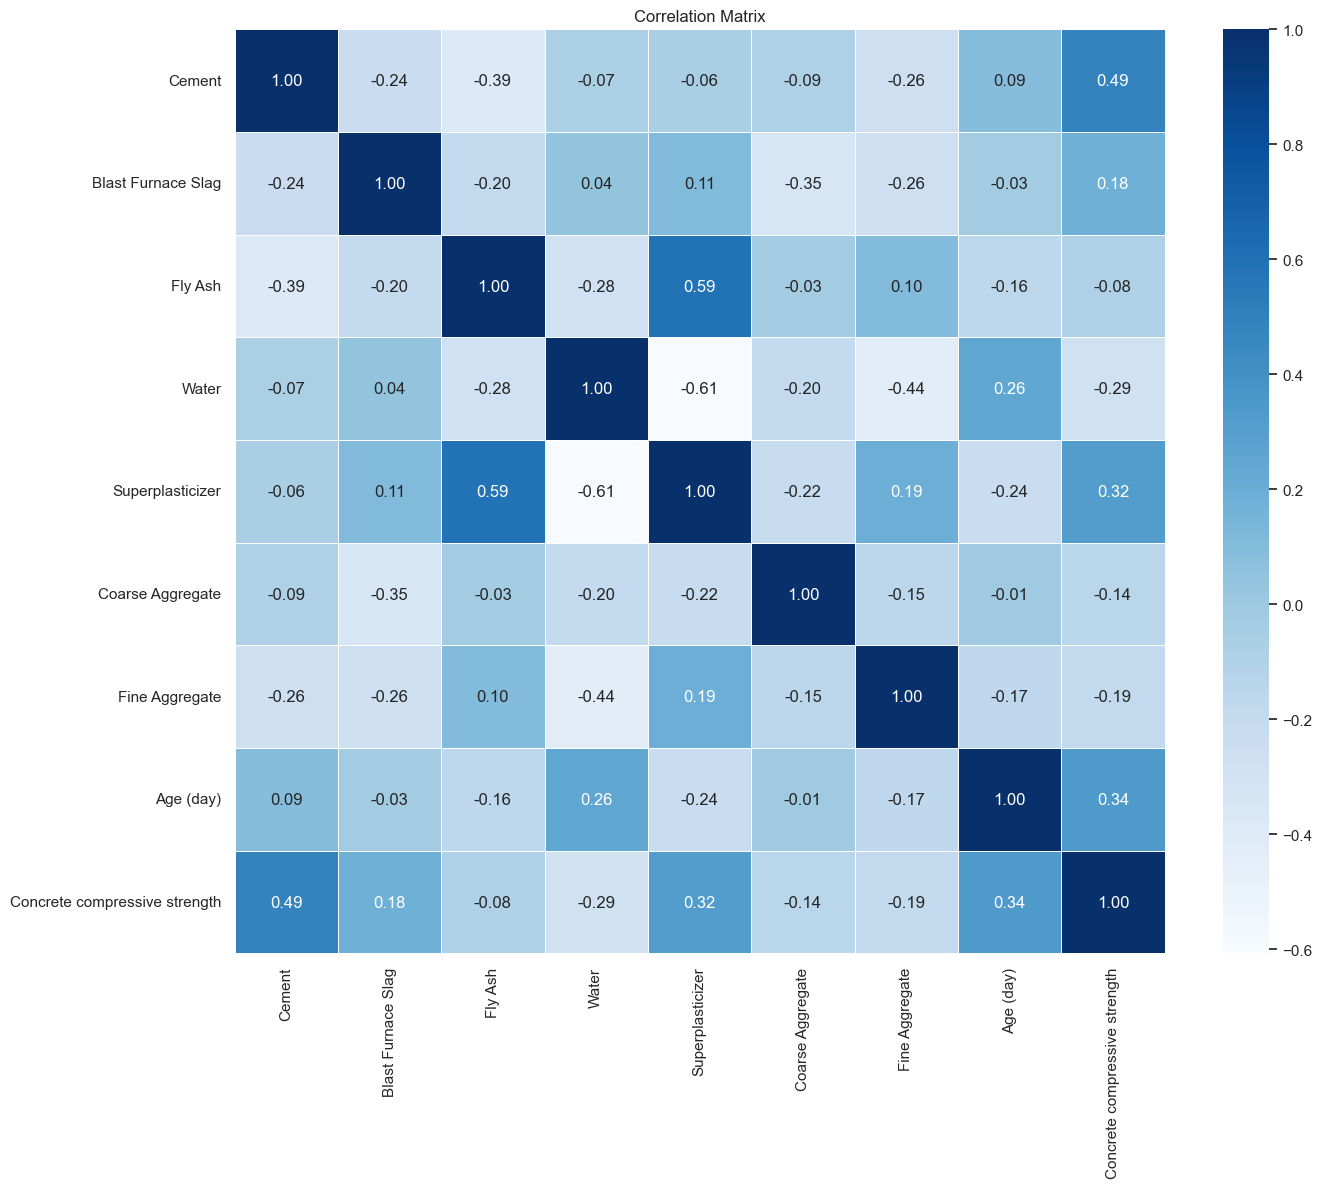

In [57]:
interval_cols = df.select_dtypes(include='interval').columns
print(interval_cols)
num_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    linewidths=0.5,
)
plt.title('Correlation Matrix')
plt.show()

In [58]:
X =df.drop(columns=['Concrete compressive strength'])  
y = df['Concrete compressive strength']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# using LinearRegression 

In [61]:
model = LinearRegression()

In [62]:
model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(X_test)

In [64]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Root Mean Squared Error (RMSE): 11.008716887022366
R² Score: 0.5937632978451237


# using RandomForestRegressor 

In [65]:
model1 = RandomForestRegressor(random_state=42, n_estimators=100)
model1.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [66]:
y_pred = model1.predict(X_test_scaled)

In [67]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 5.161319363514516
R² Score: 0.910704984552392


# using GradientBoostingRegressor & grid_search


In [68]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

In [69]:
gr_model = GradientBoostingRegressor()

In [70]:
grid_search = GridSearchCV(estimator=gr_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [71]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [72]:
print("best parameters:", grid_search.best_params_)

best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [73]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [74]:
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best RMSE: {rmse_best}")
print(f"Best R²: {r2_best}")

Best RMSE: 4.286976701342716
Best R²: 0.9383961296330922


In [76]:
print("Expected number of features:", best_model.n_features_in_)


Expected number of features: 8


In [79]:

new_data = [
    [540, 162, 2.5, 1040, 676, 28, 10, 25], 
    [610, 150, 1.5, 900, 720, 14, 5, 20]     
]

new_data_array = np.array(new_data)

new_predictions = best_model.predict(new_data_array)
print("Predictions for new data:", new_predictions)

Predictions for new data: [63.39344693 53.98183264]


# save best model 

In [80]:
import pickle
pickle.dump(best_model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))